In [1]:
import os

## switch to the root dir

In [2]:
os.chdir('..')
os.listdir()

['.git',
 '.idea',
 'data_loader',
 'data_processor',
 'jupyter',
 'loggers',
 'main.py',
 'models',
 'original_data',
 'processed_data',
 'README.md',
 'saved_models',
 'trainers']

In [3]:
from data_processor.data_processor_toolkit import load_numpy_arrays, numpy_to_tensor
from models.Linear import LogisticRegression
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn

## Load preprocessed data

In [4]:
data_train, data_val = load_numpy_arrays(['data_train.npy', 'data_val.npy'], 
                                            path_prefix='processed_data/processed_features/4-genres/')

In [5]:
X_train, y_train = data_train[:, :-1], data_train[:, -1]
X_val, y_val = data_val[:, :-1], data_val[:, -1]

In [6]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [7]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [8]:
print(X_train.shape)
print(y_train.shape)

torch.Size([3194, 57])
torch.Size([3194])


In [9]:
print(X_train[0])
print(y_train[0])

tensor([-1.5641, -0.8388, -0.6725, -0.4727, -1.1367, -0.9590, -1.2418, -0.6418,
        -1.4292, -1.0178, -0.6124, -0.7128, -0.3501, -0.5114, -0.2725, -0.8137,
         1.1590, -0.5819, -0.5639,  1.6685, -0.7834, -0.0464, -0.2956, -2.5771,
        -0.9344, -0.9167, -0.8403, -2.0586, -0.8075, -0.1764, -1.0677, -0.9795,
        -0.4747,  2.1352, -1.0326,  0.9913, -0.8415,  0.7881, -0.2459, -0.6958,
         0.1568,  0.6649, -0.4841, -1.1753,  0.7005, -0.8920, -0.3307, -0.8273,
        -0.4440,  0.2094, -0.4068, -0.3852,  0.1505, -0.7181,  0.3104, -1.0743,
         1.3346])
tensor(1)


In [10]:
print(X_val.shape)
print(y_val.shape)

torch.Size([400, 57])
torch.Size([400])


## Load model

1. define model under the folder models
2. import and define the model

In [11]:
#define model here
# for example
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 100),
            nn.ReLU(),
            nn.Linear(100, output_dim)
        )
        
    def forward(self, x):
        x = self.layers(x)
        return x

In [12]:
# define a model instance
# eg. MLP

model = MLP(57, 4)

## Define loss and optimizer

In [13]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [14]:
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train, y_train, X_val, y_val), 
                                                                                                                            loss, optimizer, batch_size=100, num_epoch=20)

Epoch  0: loss on final training batch: 0.4052
training accuracy: 89.29% validation accuracy: 90.25%
Epoch  1: loss on final training batch: 0.2092
training accuracy: 93.30% validation accuracy: 91.50%
Epoch  2: loss on final training batch: 0.1206
training accuracy: 96.06% validation accuracy: 92.50%
Epoch  3: loss on final training batch: 0.0851
training accuracy: 97.50% validation accuracy: 93.50%
Epoch  4: loss on final training batch: 0.0575
training accuracy: 98.53% validation accuracy: 94.25%
Epoch  5: loss on final training batch: 0.0486
training accuracy: 99.00% validation accuracy: 94.25%
Epoch  6: loss on final training batch: 0.0388
training accuracy: 99.25% validation accuracy: 94.25%
Epoch  7: loss on final training batch: 0.0436
training accuracy: 98.37% validation accuracy: 94.50%
Epoch  8: loss on final training batch: 0.0291
training accuracy: 98.59% validation accuracy: 93.50%
Epoch  9: loss on final training batch: 0.0252
training accuracy: 99.25% validation accurac

## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

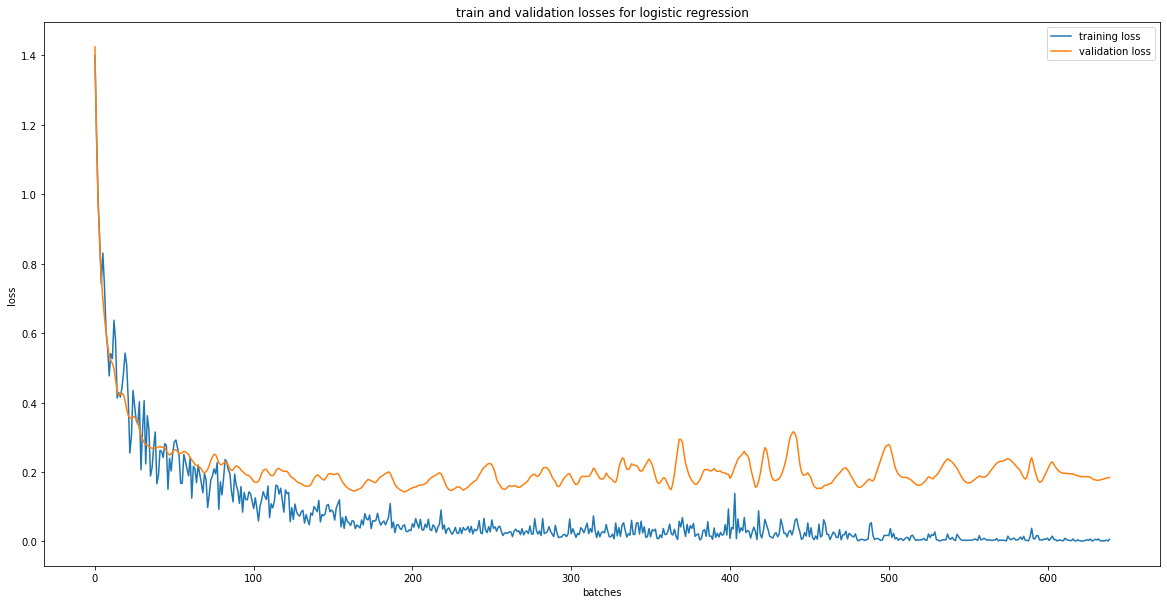

In [15]:
plot_numerical_arrays([training_loss_array, validation_loss_array], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for logistic regression')

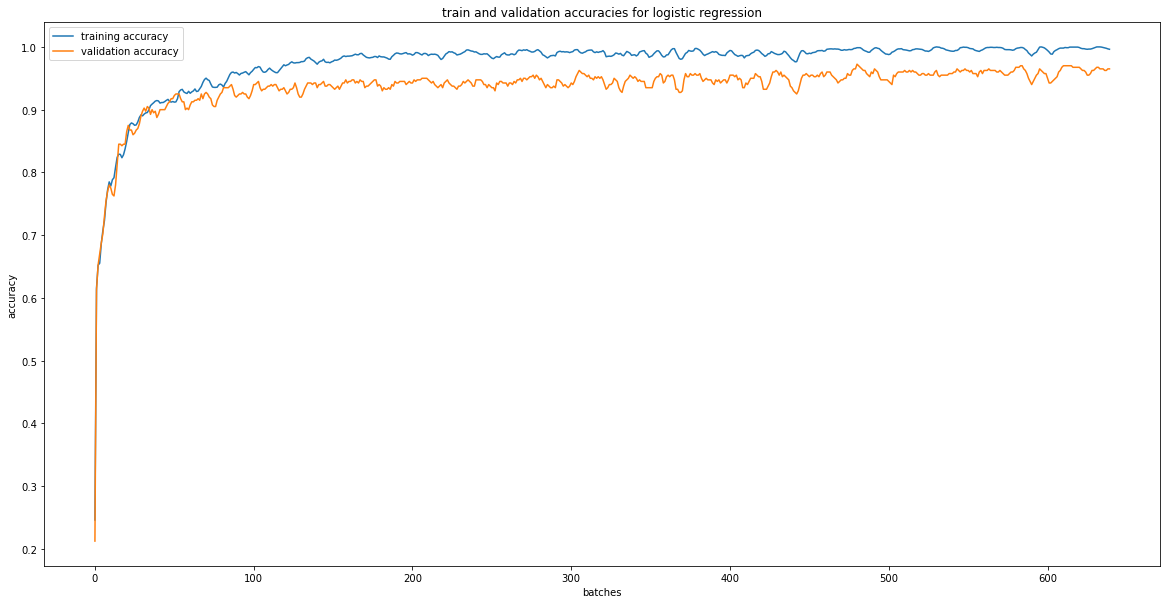

In [16]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for logistic regression')

## Save model

Save model in 'saved_models/saved_modelname_csv.pt'

In [17]:
torch.save(model.state_dict(), 'saved_models/saved_MLP_csv.pt')